In [89]:
import os
import pandas as pd
import numpy as np
import re

In [90]:
artist_dirs = [x + "/" for x in os.listdir('.')[2:] if not '.py' in x and not '.ipynb' in x and not '.csv' in x and not '.torch' in x and not 'rg_data' in x] 

In [91]:
lfiles = []

for data_dir in artist_dirs:
    for filename in os.listdir(data_dir):
        if '.csv' in filename:
            lfiles.append(data_dir + filename)

In [92]:
len(lfiles)

21538

In [42]:
lfiles[-1]

'Young-buck/{Nada_Here}_by_Ca$his__Ft_Project_Pat_&_Sullee_J_prod_by_Tha_Punisher_&_Rikanatti_LYRICS.txt'

In [33]:
all_text = ""

for filename in lfiles:
    all_text += open(filename, 'r').read()

In [39]:
with open('ALL/input.txt', 'w') as f:
    f.write(all_text)

In [40]:
len(all_text)

67946178

In [93]:
full_dat = []
for filename in lfiles:
    try:
        full_dat.append(pd.read_csv(filename, delimiter='|'))
    except:
        print "failed on file " + filename

In [94]:
train_dat = pd.concat(full_dat)

In [95]:
train_dat.shape

(363968, 2)

In [96]:
train_dat.index = range(len(train_dat.index))

In [97]:
np.sum([len(str(x).split(' ')) for x in train_dat['Ref']])

12621382

In [98]:
np.sum([len(str(x).split(' ')) for x in train_dat['Lyric']])

4622533

In [99]:
train_dat["l_words"] = train_dat.apply(lambda row: len(str(row['Lyric']).split(' ')), axis=1)

In [100]:
train_dat['r_words'] = train_dat.apply(lambda row: len(str(row['Ref']).split(' ')), axis=1)

In [102]:
train_dat['Ref'] = train_dat.apply(lambda x: re.sub(r"(?:\@|h?H?ttps?\://)\S+", "<URL>", str(x['Ref']), flags=re.MULTILINE), axis=1)

In [103]:
train_dat['Lyric'] = train_dat.apply(lambda x: re.sub(r"(?:\@|h?H?ttps?\://)\S+", "<URL>", str(x['Lyric']), flags=re.MULTILINE), axis=1)

In [105]:
train_dat_short = train_dat.loc[train_dat['r_words'] <= 50].loc[train_dat['l_words'] <= 40]
train_dat_short.shape

(284265, 4)

In [107]:
train_dat_short.head()

,Lyric,Ref,l_words,r_words
1,You not like me,A callback to 50s U Not Like Me which featured...,4,16
2,"Dr. Dre & Snoop's ""Deep Cover""",<URL>,6,1
3,G-G-G-G-G-G-Unit!,The famous saying <URL>,1,4
4,I do a 187 on your motherfuckin block,187 is a slang term for the crime of murder; i...,8,31
5,They say good things should happen to those wh...,Patience welcomes positivity into the lives of...,19,33


In [108]:
import string

valid_chars = string.letters + string.digits + "\n" + " " + "."

def valid_str(x):
    text_filt = ""

    for char in x:
        if char in valid_chars:            
            text_filt += char
        
    return text_filt.replace('50', 'fifty').replace('.', ' . ').replace('&',' and ').lower()

In [109]:
train_dat_short["Lyric"] = train_dat_short["Lyric"].apply(lambda x: valid_str(x))

In [110]:
train_dat_short["Ref"] = train_dat_short["Ref"].apply(lambda x: valid_str(x))

In [122]:
full_size = train_dat_short.shape[0]
val_size = int(full_size // 5.0)
train_size = int(full_size - val_size)

# Shuffle
train_dat_short = train_dat_short.iloc[np.random.permutation(full_size)]

train_dat_short_part = train_dat_short[:train_size]
val_dat_short = train_dat_short[-val_size:]

In [125]:
train_dat_short_part.shape

(227412, 4)

In [126]:
val_dat_short.shape

(56853, 4)

In [127]:
train_dat_short_part['Lyric'].to_csv('rg_lyrics_train.csv', index=False)
train_dat_short_part['Ref'].to_csv('rg_references_train.csv', index=False)

val_dat_short['Lyric'].to_csv('rg_lyrics_val.csv', index=False)
val_dat_short['Ref'].to_csv('rg_references_val.csv', index=False)

In [210]:
ref_words = [sentence.split(' ') for sentence in train_dat_short["Ref"]]
lyric_words = [sentence.split(' ') for sentence in train_dat_short["Lyric"]]

In [211]:
ref_words = np.array(ref_words).flatten()
lyric_words = np.array(lyric_words).flatten()

In [213]:
np.unique(ref_words).shape

(171290,)

In [ ]:
np.hstack(ref_words[0:5])

In [194]:
np.sum(train_dat['l_words'] >= 1)

251724

In [177]:
train_dat_short['l_words'].sum()

2034150

In [168]:
train_dat.shape

(251724, 4)

In [167]:
%matplotlib inline

(0, 100)

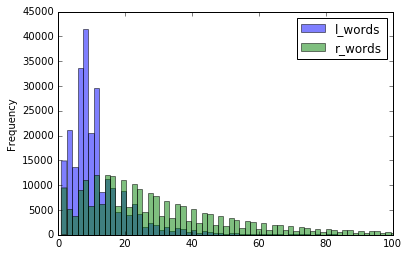

In [164]:
import pylab as plt
plt.figure()
train_dat.plot.hist(alpha=0.5, bins=5000)
plt.xlim([0,100])

In [117]:
drop_rows = []

def valid_row(row):
    if "http" in row[1]['Ref']:
        return False
    

for row in train_dat.iterrows():
    if not valid_row(row):
        drop_rows.append(row[0])
    
    if row[0] > 5:
        break

An interview with art director for GRODT; Julian Alexander  What was 50s original vision for the cover?  Julian Alexander: He wanted to have shattered glass. And I kind of envisioned it as a doorway  a shattered full glass door. And what you would see was a bullet hole in the glass and you would see his hand leaning on the glass. His posture would be kind of kneeling over  like hes leaning on the glass for support. So youd see this bullet hole, a shattered glass with a hand on it and there was gonna be blood drippin down from his hand. You wouldnt see his face, but you would see a slumped figure and blood on the hand. You would read that this person had been shot, but theyre still standing.    So how did it change from that initial idea to what the Get Rich Or Die Tryin cover eventually ended up being?   Julian Alexander: Well, I went home and put together a creative brief based on what he wanted. [And I thought], how are we going to tell this whole story? I felt that [the original] co

In [179]:
train_dat_short.head(100)

,Lyric,Ref,l_words,r_words
1,You not like me,A callback to 50s U Not Like Me which featured...,4,16
2,"Dr. Dre & Snoop's ""Deep Cover""",<URL>,6,1
3,G-G-G-G-G-G-Unit!,The famous saying <URL>,1,4
4,I do a 187 on your motherfuckin block,187 is a slang term for the crime of murder; i...,8,31
5,They say good things should happen to those wh...,Patience welcomes positivity into the lives of...,19,33
6,"I'm on first class flights, with flyin cooks C...",when rappers want to get a verse from another ...,18,44
7,"I'm the first one out, and last one on the cor...",Death could be around the corner for any man. ...,22,26
8,P89 Ruger with the silencer,The Ruger P89 is a model in the Ruger P series...,5,45
9,Let off a clip it sound like spitballs goin th...,A spitball is a scrunched up piece of paper wh...,11,47
10,These rappers is talkin 'bout bricks in they r...,Reference to a line from 50 Cents Lifes On The...,18,11


In [48]:
all_lyrics = ""
for filename in lfiles:
    f = open(filename, 'r')
    
    all_lyrics += f.read()

In [49]:
len(all_lyrics)

22909983

In [50]:
with open("ALL/" + "input.txt", "w") as text_file:
    text_file.write(all_lyrics)

In [23]:

artist_urls = ['http://genius.com/artists/Ab-soul', 
               'http://genius.com/artists/Action-bronson',
               'http://genius.com/artists/Aesop-rock',
               'http://genius.com/artists/Anderson-paak',
               'http://genius.com/artists/A-ap-ferg',
               'http://genius.com/artists/A-ap-mob',
               'http://genius.com/artists/A-ap-rocky',
               'http://genius.com/artists/Akon',
                'http://genius.com/artists/Apollo-brown',
                'http://genius.com/artists/Azizi-gibson',
                'http://genius.com/artists/Big-sean',
                'http://genius.com/artists/Boosie-badazz',
                'http://genius.com/artists/Bet-hip-hop-awards',
                'http://genius.com/artists/Busta-rhymes',
                'http://genius.com/artists/Chance-the-rapper',
                'http://genius.com/artists/Chief-keef',
                'http://genius.com/artists/Childish-gambino',
                'http://genius.com/artists/Curren-y',
               'http://genius.com/artists/Casey-veggies',
               'http://genius.com/artists/Denzel-curry',
               'http://genius.com/artists/Drake',
               'http://genius.com/artists/Drake-and-future',
               'http://genius.com/artists/Dr-dre',
               'http://genius.com/artists/E-40',
               'http://genius.com/artists/Earl-sweatshirt',
               'http://genius.com/artists/Eminem',
               'http://genius.com/artists/Eazy-e',
               'http://genius.com/artists/Fetty-wap',
               'http://genius.com/artists/Flatbush-zombies',
               'http://genius.com/artists/Freddie-gibbs',
               'http://genius.com/artists/Future',
               'http://genius.com/artists/Gucci-mane',
               'http://genius.com/artists/G-unit',
               'http://genius.com/artists/Gza',
               'http://genius.com/artists/Iamsu',
               'http://genius.com/artists/Ilovemakonnen',
               'http://genius.com/artists/Jay-z',
               'http://genius.com/artists/Jay-electronica',
               'http://genius.com/artists/Joey-bada',
               'http://genius.com/artists/Juicy-j',
               'http://genius.com/artists/J-dilla',
               'http://genius.com/artists/J-kwon',
               'http://genius.com/artists/Kanye-west',
               'http://genius.com/artists/Kendrick-lamar',
               'http://genius.com/artists/Lil-wayne',
               'http://genius.com/artists/Logic',
               'http://genius.com/artists/Migos',
               'http://genius.com/artists/Nas',
               'http://genius.com/artists/The-notorious-big',
               'http://genius.com/artists/Nwa',
               'http://genius.com/artists/Odd-future',
               'http://genius.com/artists/Oddisee',
               'http://genius.com/artists/Pusha-t',
               'http://genius.com/artists/Rae-sremmurd',
               'http://genius.com/artists/Rich-homie-quan',
               'http://genius.com/artists/Rich-gang',
               'http://genius.com/artists/Rick-ross',
               'http://genius.com/artists/Rza',
               'http://genius.com/artists/Schoolboy-q',
               'http://genius.com/artists/Snoop-dogg',
               'http://genius.com/artists/Tech-n9ne',
               'http://genius.com/artists/Tory-lanez',
               'http://genius.com/artists/Ty-dolla-sign',
               'http://genius.com/artists/Tyler-the-creator',
               'http://genius.com/artists/Tyga',
               'http://genius.com/artists/Wiz-khalifa',
               'http://genius.com/artists/Wu-tang-clan',
               'http://genius.com/artists/Yg',
               'http://genius.com/artists/Young-thug']


In [26]:
18.0/len(artist_urls)

0.2608695652173913